In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Read the Data**

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/churn.csv",encoding="Latin")

In [3]:
data

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

**Descriptive Statistics**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [5]:
#drop unwanted columns : 'Unnamed 0'
df = data.drop(columns = ['Unnamed: 0'])
df.sample()
df = data.copy()

In [6]:
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [7]:
#Converting data types from object to float
df['day.charge'] = pd.to_numeric(data['day.charge'],errors='coerce')
df['eve.mins'] = pd.to_numeric(data['eve.mins'],errors='coerce')

In [8]:
df.describe()

Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  5000.000000      5000.00000     5000.000000  5000.000000  5000.000000   
mean   2500.500000       100.25860        7.755200    10.261780     4.435200   
std    1443.520003        39.69456       13.546393     2.761396     2.456788   
min       1.000000         1.00000        0.000000     0.000000     0.000000   
25%    1250.750000        73.00000        0.000000     8.500000     3.000000   
50%    2500.500000       100.00000        0.000000    10.300000     4.000000   
75%    3750.250000       127.00000       17.000000    12.000000     6.000000   
max    5000.000000       243.00000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls   day.charge     eve.mins  \
count  5000.000000  5000.000000  5000.000000  4993.000000  4976.000000   
mean      2.771196   180.288900   100.029400    30.653501   200.580326   
std       0.745514    53.894699    19.831197     9.166356    50.554637   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    24.430000   166.275000   
50%       2.780000   180.100000   100.000000    30.620000   201.000000   
75%       3.240000   216.200000   113.000000    36.750000   234.100000   
max       5.400000   351.500000   165.000000    59.760000   363.700000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean    100.191000    17.054322   200.391620    99.919200      9.017732   
std      19.826496     4.296843    50.527789    19.958686      2.273763   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    14.140000   166.900000    87.000000      7.510000   
50%     100.000000    17.090000   200.400000   100.000000      9.020000   
75%     114.000000    19.900000   234.700000   113.000000     10.560000   
max     170.000000    30.910000   395.000000   175.000000     17.770000   

       customer.calls  
count     5000.000000  
mean         1.570400  
std          1.306363  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

In [9]:
df.shape

(5000, 21)

In [10]:
df.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [11]:
# Missing values
df.isnull().any()

Unnamed: 0        False
state             False
area.code         False
account.length    False
voice.plan        False
voice.messages    False
intl.plan         False
intl.mins         False
intl.calls        False
intl.charge       False
day.mins          False
day.calls         False
day.charge         True
eve.mins           True
eve.calls         False
eve.charge        False
night.mins        False
night.calls       False
night.charge      False
customer.calls    False
churn             False
dtype: bool

In [12]:
# To check whether there is any null value in the column
df.isna().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

**Mean Imputation**

In [13]:
#Calculate mean for particular columns
day_crg_mean = np.mean(df['day.charge'])
eve_min_mean = np.mean(df['eve.mins'])

#replace values
df['day.charge'] = df['day.charge'].fillna(day_crg_mean)
df['eve.mins'] = df['eve.mins'].fillna(eve_min_mean)

In [14]:
df.isna().values.any()

False

In [15]:
df.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [16]:
#check for duplicates
df.duplicated().sum()


0

**Finding total numbersof unique values in all columns**

In [17]:
'''# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))'''

"# check unique values of each column\nfor column in df.columns:\n    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))"

In [18]:
#unique values in target column
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
#value counts for churn
df['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

Hence, 4293 people are continuing the service with company and remaining 707 discontinued.

In [20]:
#value counts for intl.plan
df['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

Hence, there are very few customers opted for international plan i.e. 473



In [21]:
#value counts for voice.plan
df['voice.plan'].value_counts()


no     3677
yes    1323
Name: voice.plan, dtype: int64

Here, people opted for voice plan are 1323 and people with no voice plan are 3677

In [22]:
#unique values of each column
df.nunique()

Unnamed: 0        5000
state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1962
eve.mins          1877
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

 DATA VISUALIZATION

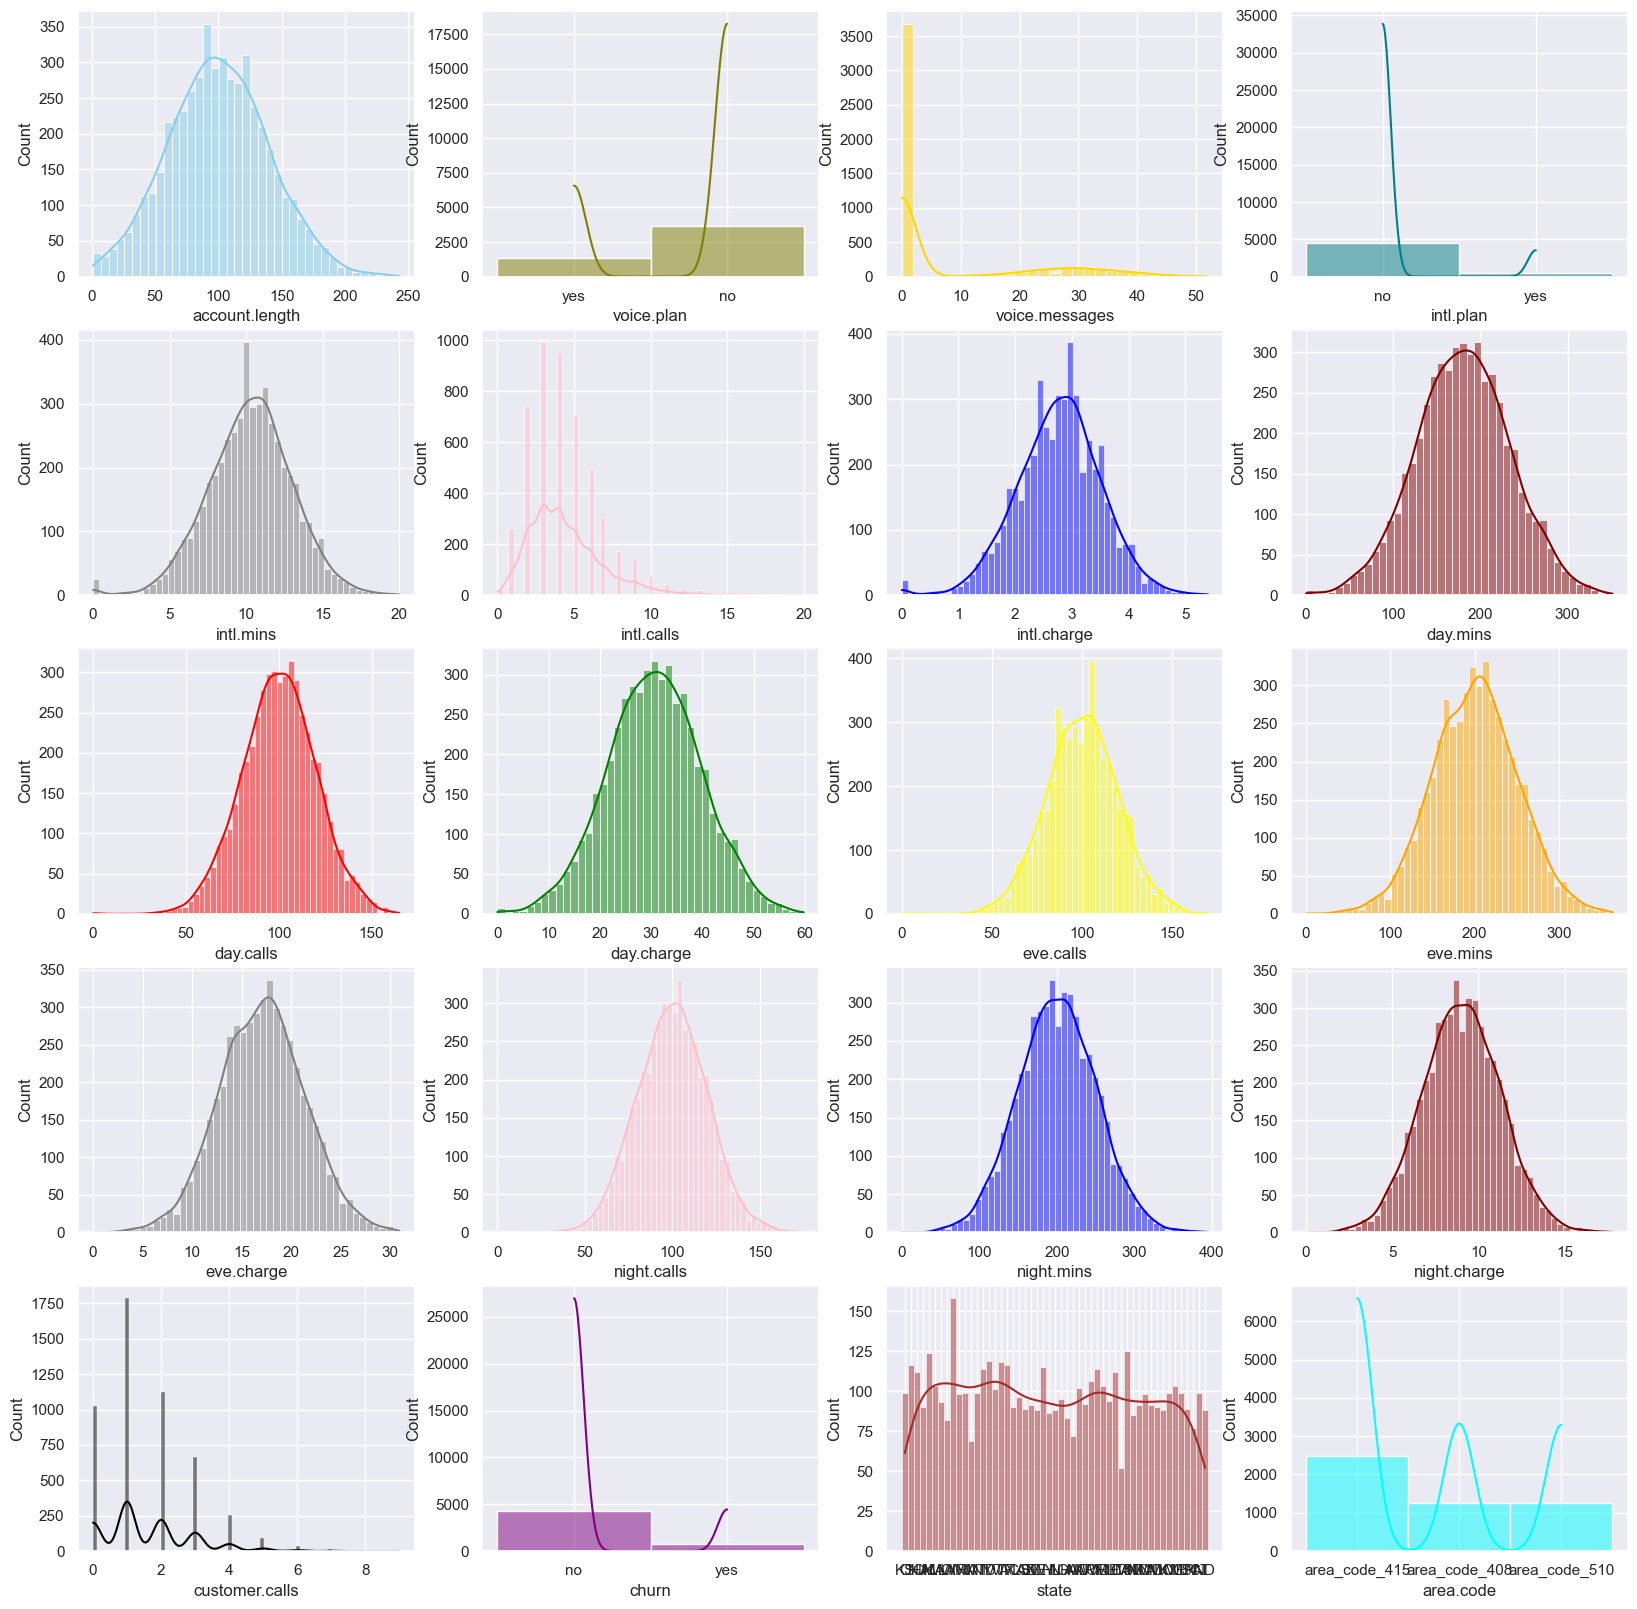

In [23]:
#df.hist(figsize=(15,15))
#plt.show()

sns.set(style=('darkgrid'))
fig, axs = plt.subplots(5, 4, figsize=(20, 20))
sns.histplot(data=df, x='account.length', kde=True, color='skyblue', ax=axs[0,0])
sns.histplot(data=df, x='voice.plan', kde=True, color='olive', ax=axs[0,1])
sns.histplot(data=df, x='voice.messages', kde=True, color='gold', ax=axs[0,2])
sns.histplot(data=df, x='intl.plan', kde=True, color='teal', ax=axs[0,3])
sns.histplot(data=df, x='intl.mins', kde=True, color='grey', ax=axs[1,0])
sns.histplot(data=df, x='intl.calls', kde=True, color='pink', ax=axs[1,1])
sns.histplot(data=df, x='intl.charge', kde=True, color='blue', ax=axs[1,2])
sns.histplot(data=df, x='day.mins', kde=True, color='maroon', ax=axs[1,3])
sns.histplot(data=df, x='day.calls', kde=True, color='red', ax=axs[2,0])
sns.histplot(data=df, x='day.charge', kde=True, color='green', ax=axs[2,1])
sns.histplot(data=df, x='eve.calls', kde=True, color='yellow', ax=axs[2,2])
sns.histplot(data=df, x='eve.mins', kde=True, color='orange', ax=axs[2,3])
sns.histplot(data=df, x='eve.charge', kde=True, color='grey', ax=axs[3,0])
sns.histplot(data=df, x='night.calls', kde=True, color='pink', ax=axs[3,1])
sns.histplot(data=df, x='night.mins', kde=True, color='blue', ax=axs[3,2])
sns.histplot(data=df, x='night.charge', kde=True, color='maroon', ax=axs[3,3])
sns.histplot(data=df, x='customer.calls', kde=True, color='black', ax=axs[4,0])
sns.histplot(data=df, x='churn', kde=True, color='purple', ax=axs[4,1])
sns.histplot(data=df, x='state', kde=True, color='brown', ax=axs[4,2])
sns.histplot(data=df, x='area.code', kde=True, color='aqua', ax=axs[4,3])
plt.show()

Hence, as per above observation we can say that almost all the attributes are normally distributed except 'customer.calls' and 'intl.call' are slightly skewed towards right.

In [24]:
churned = df[df['churn']=='yes']
not_churned = df[df['churn']=='no']

print('percentage of churned customer: {}'.format(churned.shape[0]/df.shape[0]))
print('percentage of not-churned customer: {}'.format(not_churned.shape[0]/df.shape[0]))

percentage of churned customer: 0.1414
percentage of not-churned customer: 0.8586


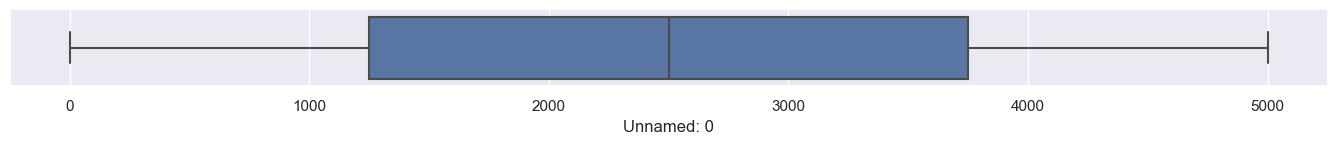

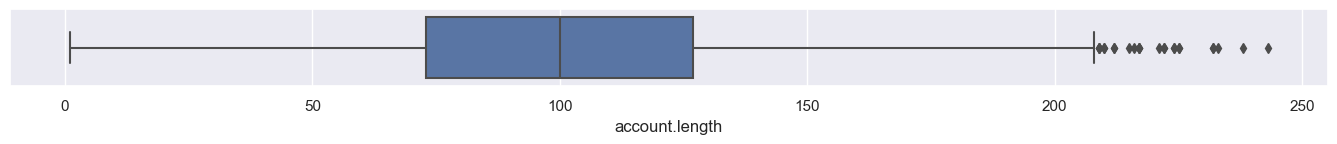

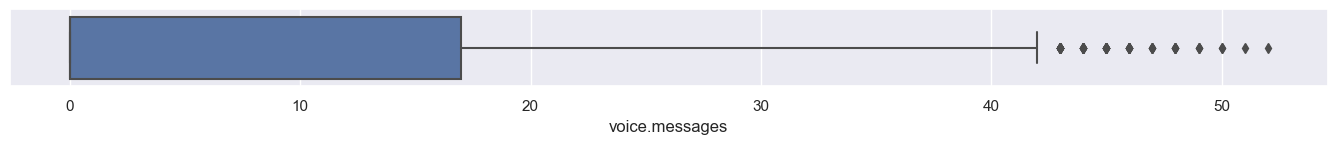

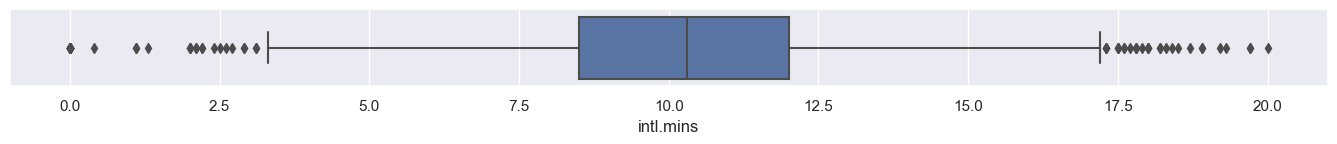

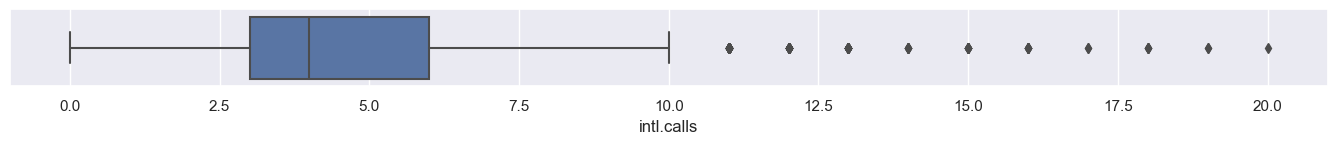

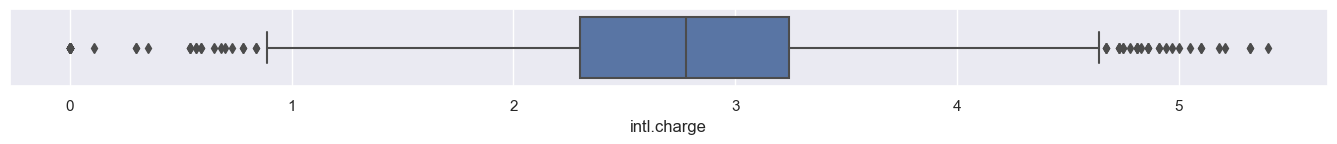

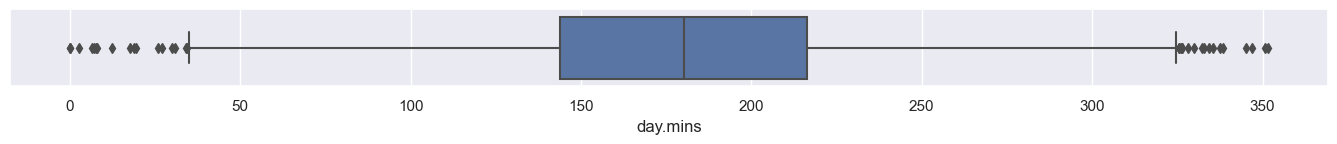

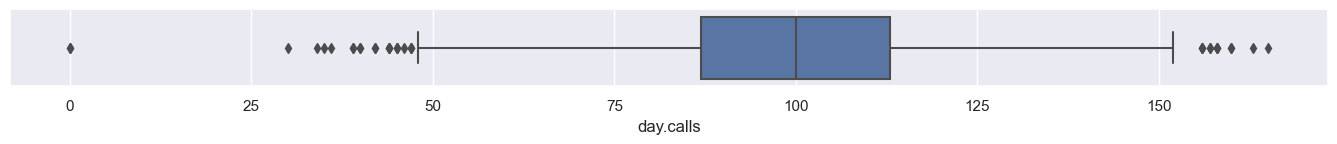

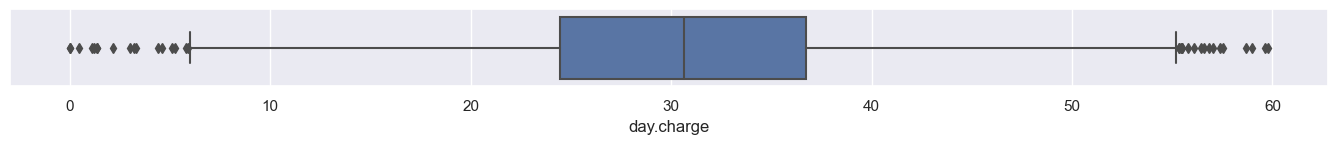

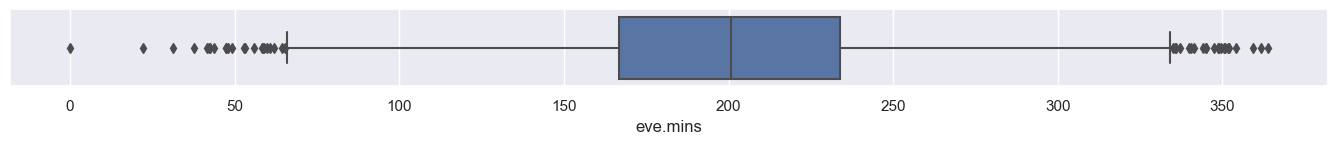

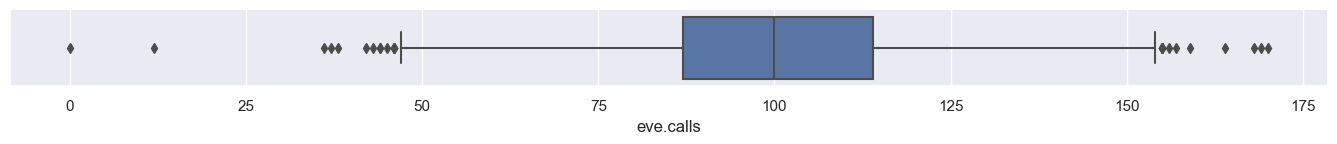

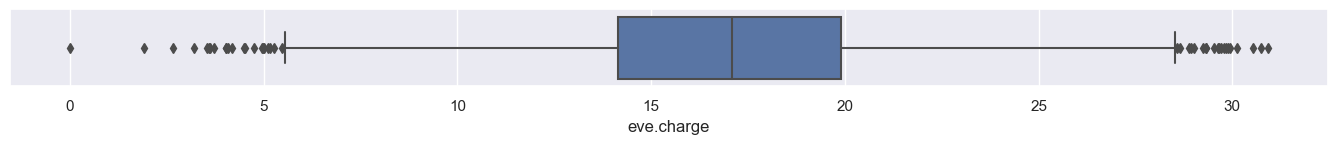

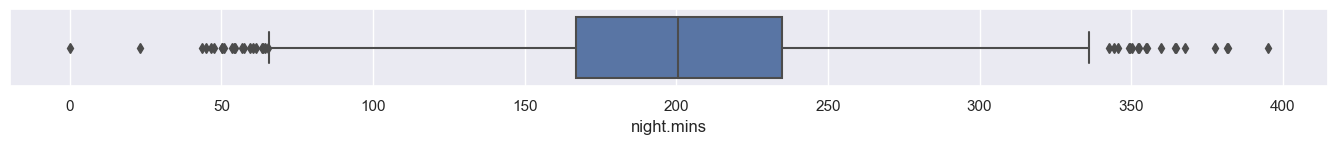

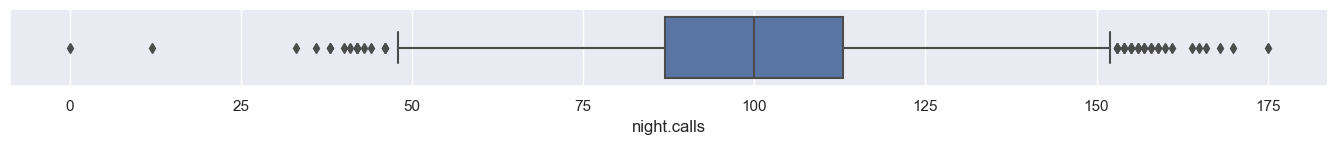

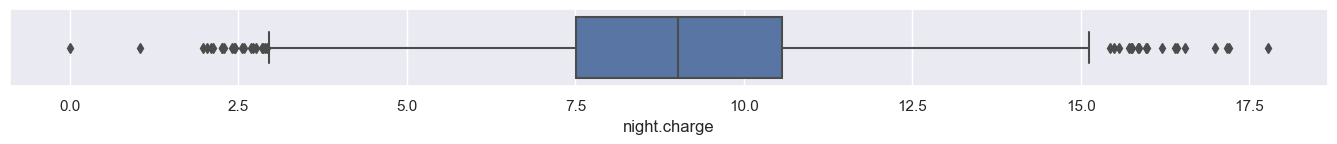

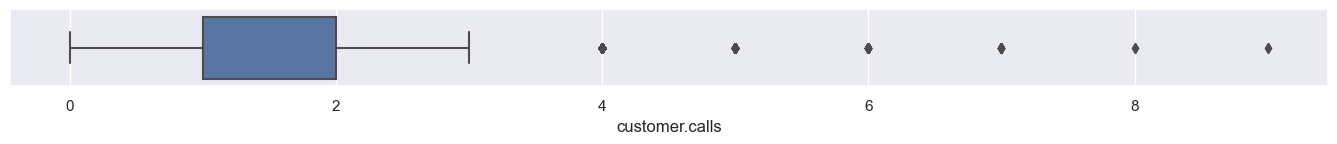

In [25]:
#Printing boxplot for each numerical column present in the data set
df_boxplot = df.select_dtypes(exclude=['object','bool'])
for column in df_boxplot:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)
plt.show()

with the help of above graph,we can say that there are outlier in our dataset.

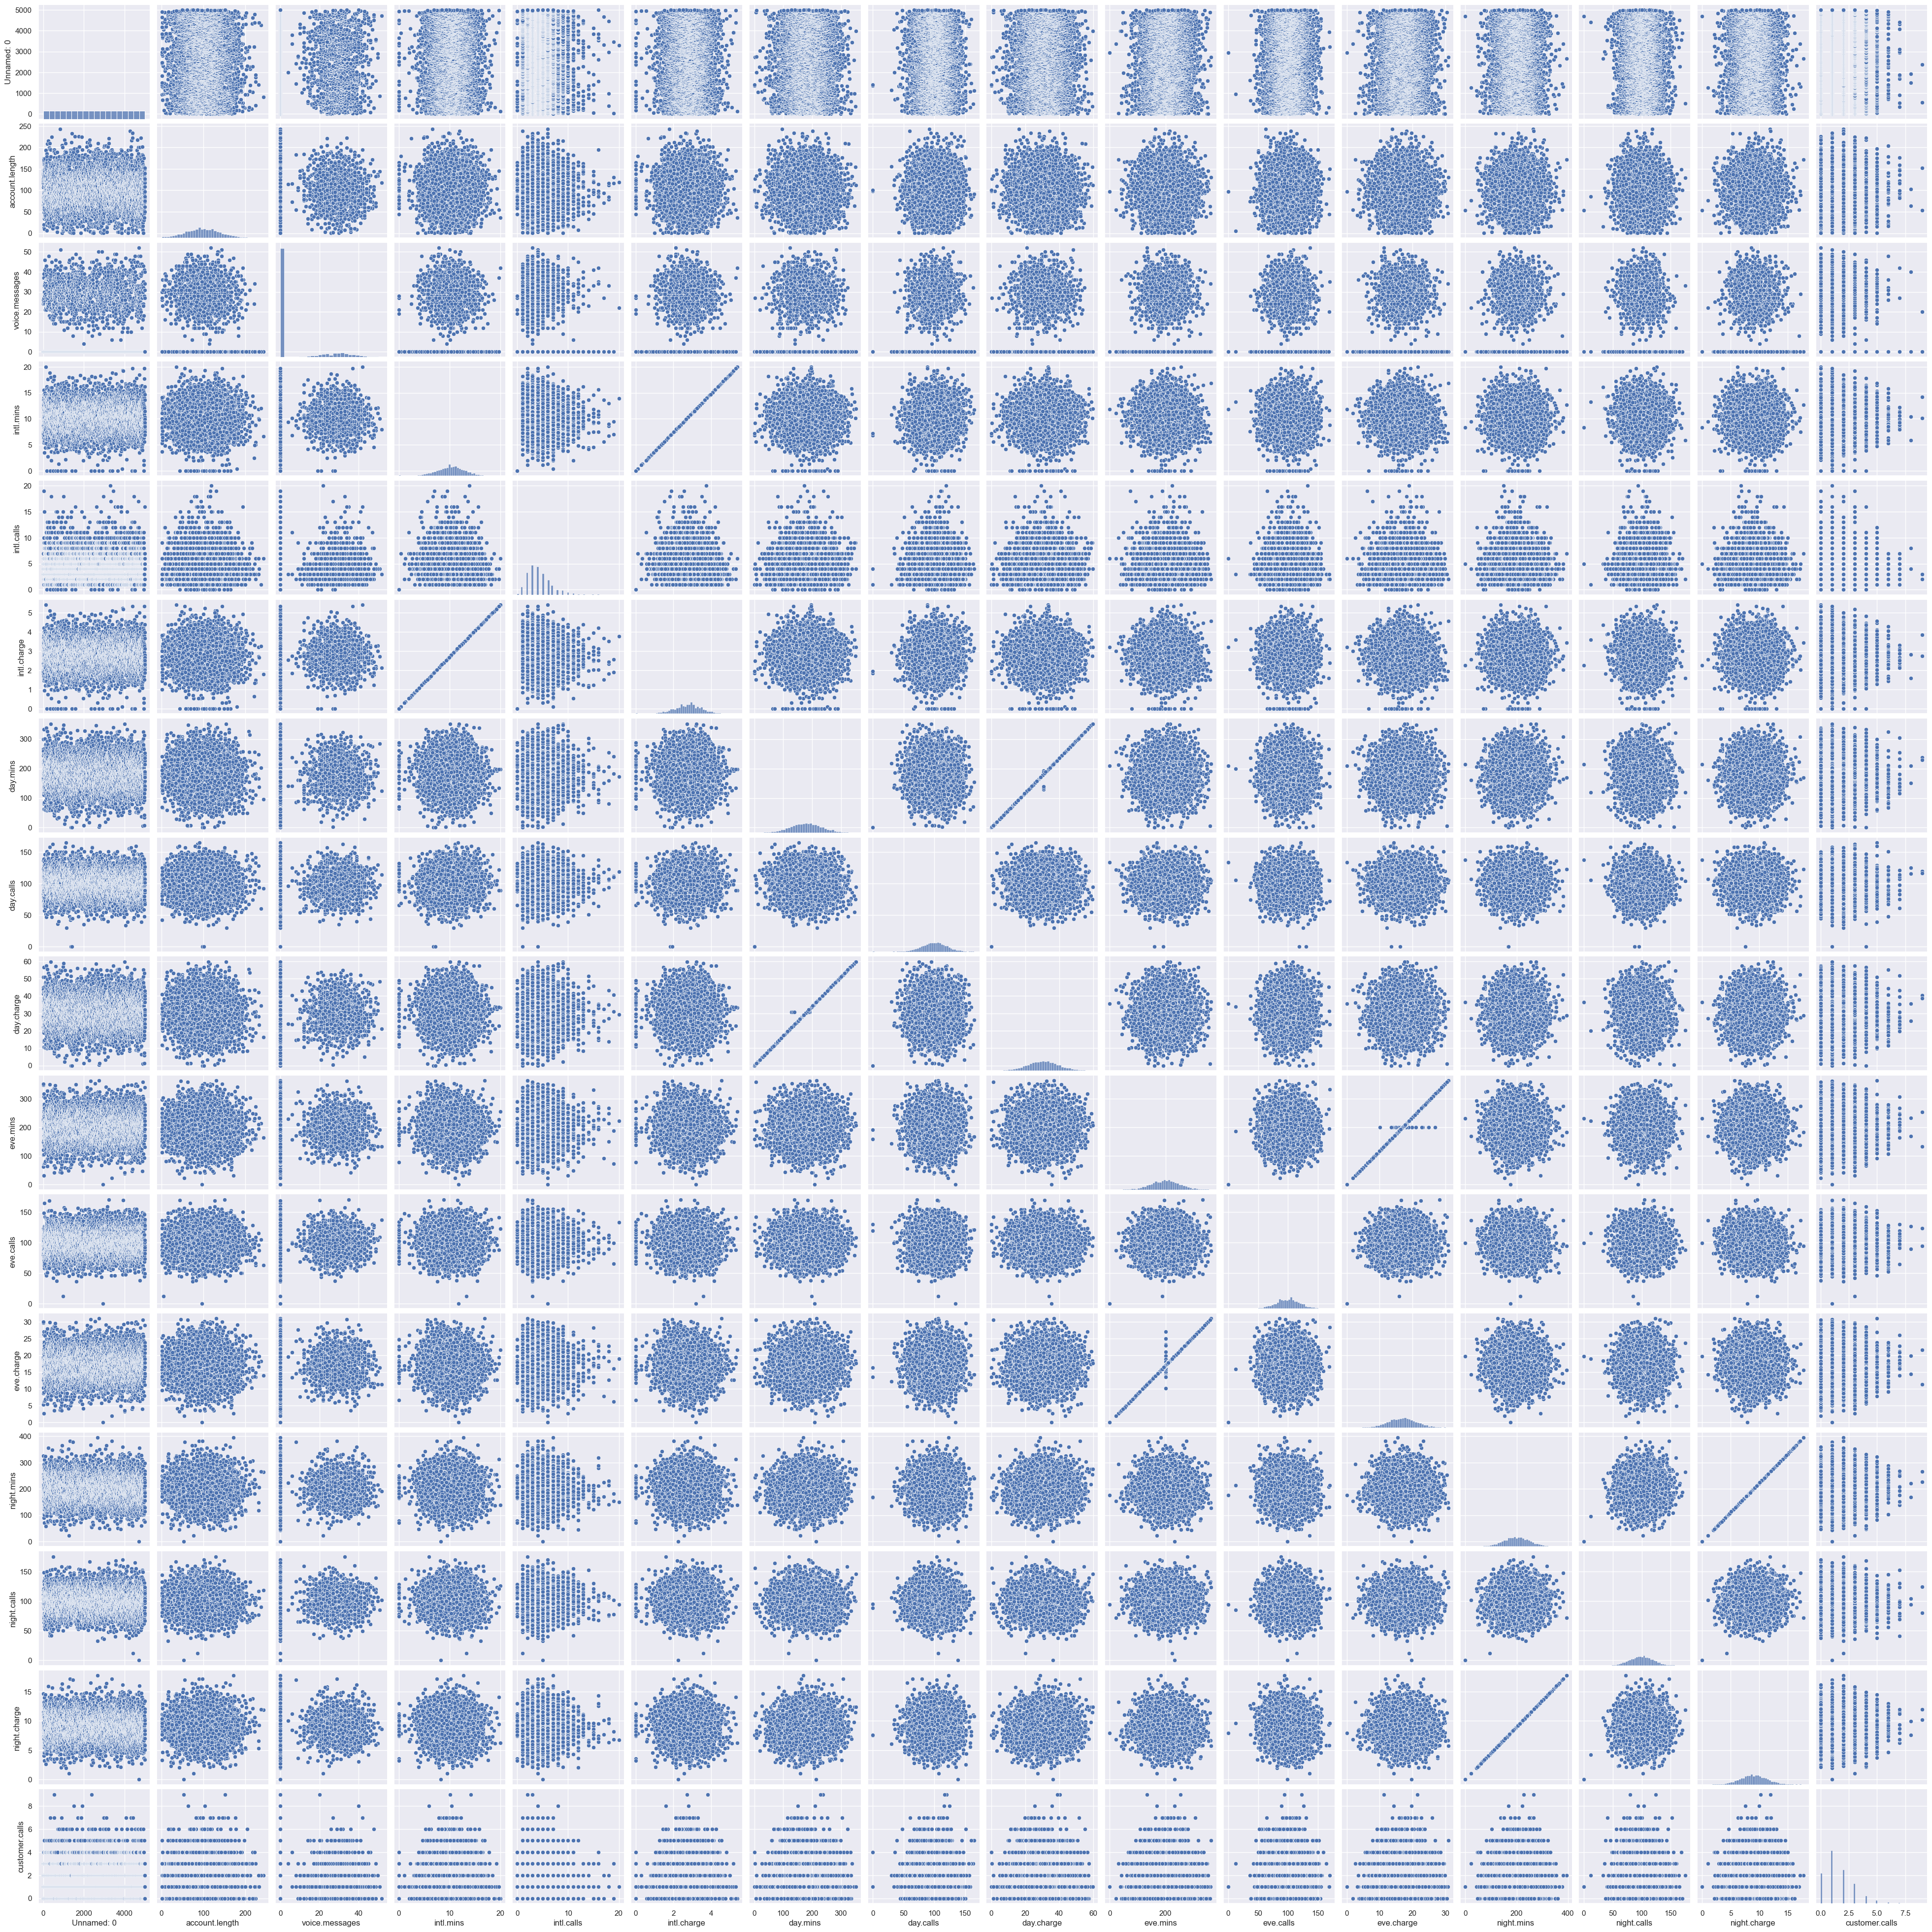

In [26]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

Several of the numerical data are very correlated.(Total Day min and Total Day charge), ( Total Eve min and Total Eve charge), (Total Night min and total Night charge) (Total International min and Total international Charge) are highly correlated(100%) .We have selected all of them who has correlation 90% or more than 90%.

C:\Users\HP\AppData\Local\Temp\ipykernel_13784\368596040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)


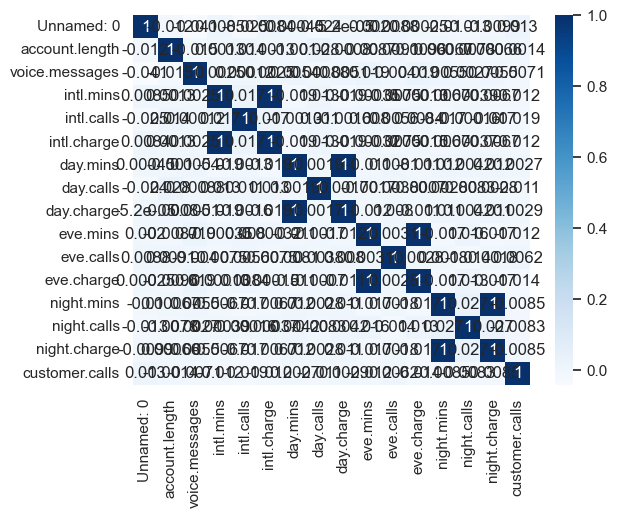

In [27]:
 sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)
plt.rcParams['figure.figsize']=(30,20)

Plotting scatter plot whose correlation is 90% or more

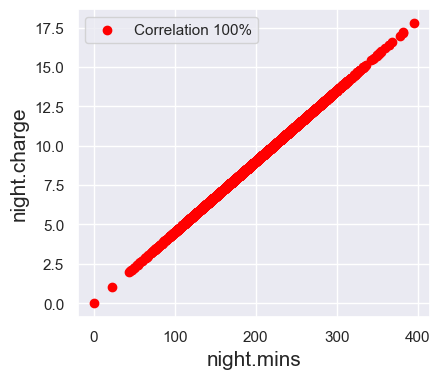

In [28]:
# Night minutes and Night Charge Correlation - 100%
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["night.mins"],df["night.charge"],color="red",label="Correlation 100%")
plt.xlabel("night.mins",size=15)
plt.ylabel("night.charge",size=15)
plt.legend(loc="best")

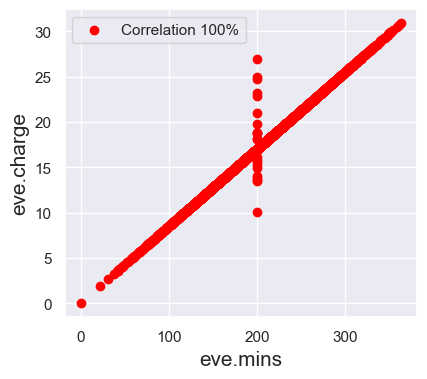

In [29]:
# Evening minutes and Evening Charge Correlation - 100%
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["eve.mins"],df["eve.charge"],color="red",label="Correlation 100%")
plt.xlabel("eve.mins",size=15)
plt.ylabel("eve.charge",size=15)
plt.legend(loc="best")


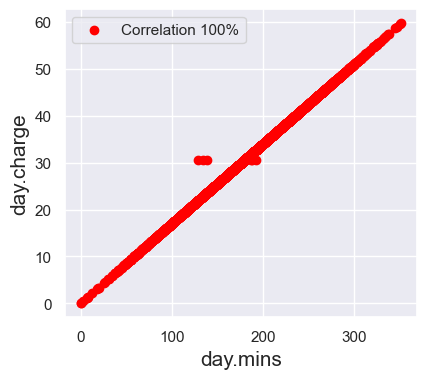

In [30]:
# Day minutes and Day Charge Correlation - 100%
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["day.mins"],df["day.charge"],color="red",label="Correlation 100%")
plt.xlabel("day.mins",size=15)
plt.ylabel("day.charge",size=15)
plt.legend(loc="best")


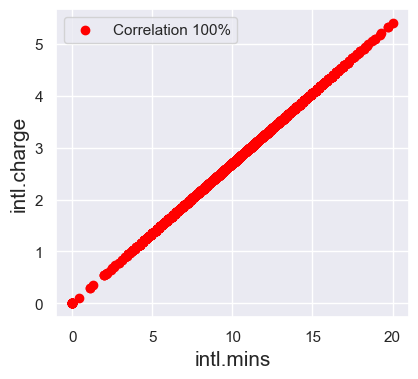

In [31]:
 #International  minutes and International Charge Correlation - 100%
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["intl.mins"],df["intl.charge"],color="red",label="Correlation 100%")
plt.xlabel("intl.mins",size=15)
plt.ylabel("intl.charge",size=15)
plt.legend(loc="best")


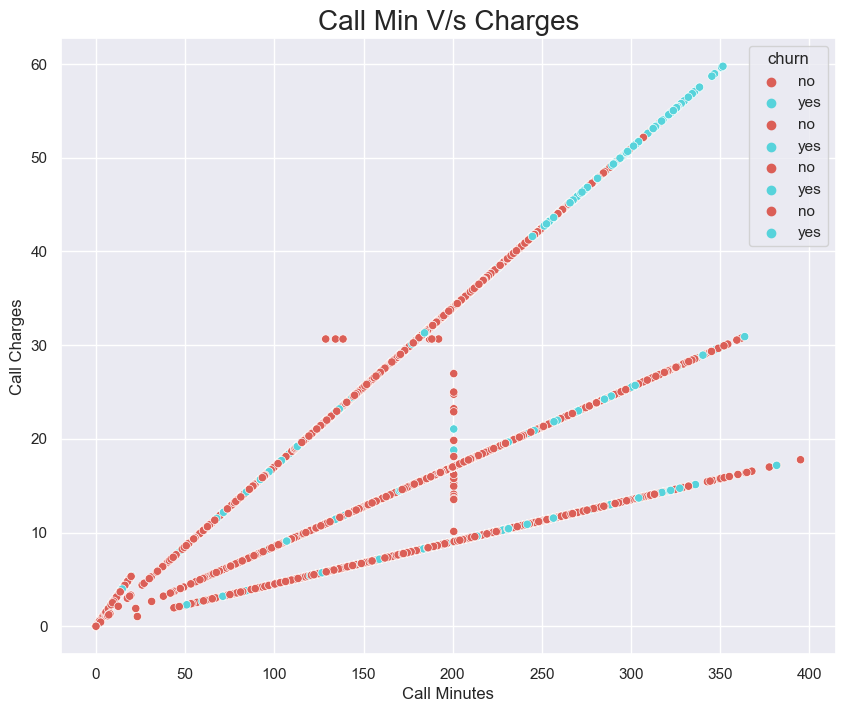

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="intl.mins", y="intl.charge", hue="churn", data=df,palette='hls')
sns.scatterplot(x="day.mins", y="day.charge", hue="churn", data=df,palette='hls')
sns.scatterplot(x="eve.mins", y="eve.charge", hue="churn", data=df,palette='hls')
sns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=df,palette='hls')
plt.xlabel('Call Minutes')
plt.ylabel('Call Charges')
plt.title('Call Min V/s Charges',fontsize=20)
plt.show()

In [33]:
'''plt.figure(figsize=(10,8))
sns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=df,palette='hls')
plt.show()'''


'plt.figure(figsize=(10,8))\nsns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=df,palette=\'hls\')\nplt.show()'

From the above plots, it is observed that higher the charges higher is the churn rate.

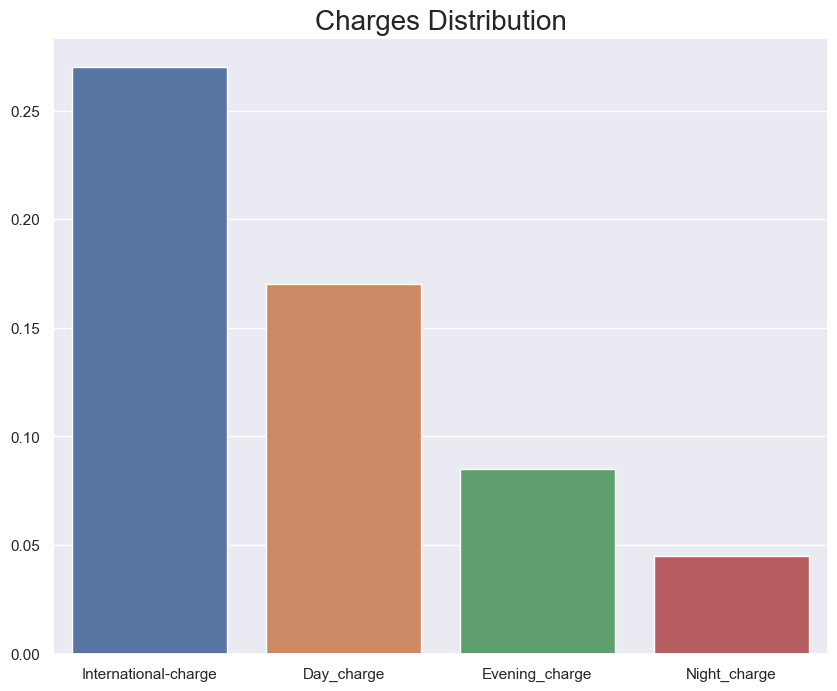

In [34]:
#Relation between overall call charge and overall call minutes
day_charge_perm = df['day.charge'].mean()/df['day.mins'].mean()
eve_charge_perm = df['eve.charge'].mean()/df['eve.mins'].mean()
night_charge_perm = df['night.charge'].mean()/df['night.mins'].mean()
intl_charge_perm= df['intl.charge'].mean()/df['intl.mins'].mean()

plt.figure(figsize=(10,8))
sns.barplot(x=['International-charge','Day_charge','Evening_charge','Night_charge'],y=[intl_charge_perm,day_charge_perm,eve_charge_perm,night_charge_perm])
plt.title('Charges Distribution',fontsize=20)
plt.show()

It is observed that as International charges are very high as compared to other charges,it might be one of the reasons that the customers opting for international plan are churning at a higher rate.

FEATURES ENGINERING

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer



In [36]:
# import pandas as pd

# data['voice.plan'] = data['voice.plan'].map({'yes': 1, 'no': 0})

# If you have NaN values and want to handle them
data['voice.plan'] = data['voice.plan'].map({'yes': 1, 'no': 0, None: -1})
data['voice.plan']

0       1
1       1
2       0
3       0
4       0
       ..
4995    1
4996    0
4997    0
4998    0
4999    1
Name: voice.plan, Length: 5000, dtype: int64

In [37]:
data['intl.plan'] = data['intl.plan'].map({'yes': 1, 'no': 0})
data['intl.plan'] 

0       0
1       0
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: intl.plan, Length: 5000, dtype: int64

In [38]:
data['churn'] = data['churn'].map({'yes': 1, 'no': 0})
data['churn'] 

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 5000, dtype: int64

In [39]:
# Create a new feature: total charges
data['total_charge'] = (
    data['day.charge'].astype(str) + 
    data['eve.charge'].astype(str) + 
    data['night.charge'].astype(str) + 
    data['intl.charge'].astype(str)
)

# Drop unnecessary columns
columns_to_drop = ['day.mins', 'eve.mins', 'night.mins', 'day.calls', 'eve.calls', 'night.calls', 'intl.charge']
data = data.drop(columns=columns_to_drop)

# Display the first few rows of the modified DataFrame
print(data.head())





   Unnamed: 0 state      area.code  account.length  voice.plan  \
0           1    KS  area_code_415             128           1   
1           2    OH  area_code_415             107           1   
2           3    NJ  area_code_415             137           0   
3           4    OH  area_code_408              84           0   
4           5    OK  area_code_415              75           0   

   voice.messages  intl.plan  intl.mins  intl.calls day.charge  eve.charge  \
0              25          0       10.0           3      45.07       16.78   
1              26          0       13.7           3      27.47       16.62   
2               0          0       12.2           5      41.38       10.30   
3               0          1        6.6           7       50.9        5.26   
4               0          1       10.1           3      28.34       12.61   

   night.charge  customer.calls  churn        total_charge  
0         11.01               1      0  45.0716.7811.012.7  
1         11

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Remove non-numeric columns 
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]

# Split the data into features (X) and target (y)
X = data_numeric.drop('churn', axis=1)
y = data_numeric['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Print the first few rows of the modified dataset
print(data_numeric.head())


   Unnamed: 0  account.length  voice.plan  voice.messages  intl.plan  \
0           1             128           1              25          0   
1           2             107           1              26          0   
2           3             137           0               0          0   
3           4              84           0               0          1   
4           5              75           0               0          1   

   intl.mins  intl.calls  eve.charge  night.charge  customer.calls  churn  
0       10.0           3       16.78         11.01               1      0  
1       13.7           3       16.62         11.45               1      0  
2       12.2           5       10.30          7.32               0      0  
3        6.6           7        5.26          8.86               2      0  
4       10.1           3       12.61          8.41               3      0  


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       833
           1       0.58      0.18      0.27       161

    accuracy                           0.85       994
   macro avg       0.72      0.58      0.59       994
weighted avg       0.81      0.85      0.81       994

Confusion Matrix:
 [[812  21]
 [132  29]]


In [72]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       833
           1       0.93      0.72      0.81       161

    accuracy                           0.95       994
   macro avg       0.94      0.85      0.89       994
weighted avg       0.94      0.95      0.94       994

Confusion Matrix:
 [[824   9]
 [ 45 116]]


In [73]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use a DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       833
           1       0.72      0.70      0.71       161

    accuracy                           0.91       994
   macro avg       0.83      0.83      0.83       994
weighted avg       0.91      0.91      0.91       994

Confusion Matrix:
 [[790  43]
 [ 48 113]]


In [74]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use a KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.93       833
           1       0.77      0.27      0.40       161

    accuracy                           0.87       994
   macro avg       0.82      0.63      0.66       994
weighted avg       0.86      0.87      0.84       994

Confusion Matrix:
 [[820  13]
 [118  43]]


In [75]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use a BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       833
           1       0.88      0.68      0.76       161

    accuracy                           0.93       994
   macro avg       0.91      0.83      0.86       994
weighted avg       0.93      0.93      0.93       994

Confusion Matrix:
 [[818  15]
 [ 52 109]]


In [76]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use a AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       833
           1       0.65      0.34      0.44       161

    accuracy                           0.86       994
   macro avg       0.77      0.65      0.68       994
weighted avg       0.84      0.86      0.84       994

Confusion Matrix:
 [[804  29]
 [107  54]]


In [77]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use a SVC
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       833
           1       1.00      0.03      0.06       161

    accuracy                           0.84       994
   macro avg       0.92      0.52      0.49       994
weighted avg       0.87      0.84      0.78       994

Confusion Matrix:
 [[833   0]
 [156   5]]


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming X_train_scaled and y_train are the training data and labels respectively
# Assuming X_test_scaled and y_test are the testing data and labels respectively

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_accuracy = logreg_model.score(X_test_scaled, y_test)
print("Logistic Regression:", logreg_accuracy)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_accuracy = rf_model.score(X_test_scaled, y_test)
print("Random Forest:", rf_accuracy)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_accuracy = dt_model.score(X_test_scaled, y_test)
print("Decision Tree:", dt_accuracy)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)
print("K-Nearest Neighbors:", knn_accuracy)

# Bagging Classifier
bagging_model = BaggingClassifier()
bagging_model.fit(X_train_scaled, y_train)
bagging_accuracy = bagging_model.score(X_test_scaled, y_test)
print("Bagging Classifier:", bagging_accuracy)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)
adaboost_accuracy = adaboost_model.score(X_test_scaled, y_test)
print("AdaBoost Classifier:", adaboost_accuracy)

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
svc_accuracy = svc_model.score(X_test_scaled, y_test)
print("Support Vector Classifier:", svc_accuracy)


Logistic Regression: 0.8460764587525151
Random Forest: 0.9476861167002012
Decision Tree: 0.9154929577464789
K-Nearest Neighbors: 0.8893360160965795
Bagging Classifier: 0.9396378269617707
AdaBoost Classifier: 0.8631790744466801
Support Vector Classifier: 0.9175050301810865


In [89]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming you have trained models as shown in your example
# ...

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train your models as shown in your example
# ...

# Save the trained models and the scaler using pickle
with open('trained_models.pkl', 'wb') as file:
    saved_data = {
        'scaler': scaler,
        'logreg_model': logreg_model,  # Replace with your actual model objects
        'random_forest_model': random_forest_model,
        'decision_tree_model': decision_tree_model,
        'knn_model': knn_model,
        'bagging_model': bagging_model,
        'adaboost_model': adaboost_model,
        'svc_model': svc_model
    }
    pickle.dump(saved_data, file)


NameError: name 'random_forest_model' is not defined

In [90]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming you have trained models as shown in your example
logreg_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
bagging_model = BaggingClassifier()
adaboost_model = AdaBoostClassifier()
svc_model = SVC()

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train your models as shown in your example
# ...

# Save the trained models and the scaler using pickle
with open('trained_models.pkl', 'wb') as file:
    saved_data = {
        'scaler': scaler,
        'logreg_model': logreg_model,
        'random_forest_model': random_forest_model,
        'decision_tree_model': decision_tree_model,
        'knn_model': knn_model,
        'bagging_model': bagging_model,
        'adaboost_model': adaboost_model,
        'svc_model': svc_model
    }
    pickle.dump(saved_data, file)
